In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import os
import pandas as pd
import time
import re
from datetime import datetime
import sys
import csv
import seaborn as sns
from collections import Counter
from IPython.display import Image

print(sys.version, "\n")

now = datetime.now()
print("last run on " + str(now))

3.6.1 |Anaconda custom (64-bit)| (default, May 11 2017, 13:04:09) 
[GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)] 

last run on 2018-02-01 10:16:42.328219


In [2]:
# define directories
baseDir = os.getcwd()
dataDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Data/'
figDir = '/Users/cswitzer/Dropbox/mothMachineLearning_dataAndFigs/Figs/'

In [3]:
# read in data
spray = pd.read_csv(os.path.join(dataDir, "Q_secondspray.csv"), header = None)
forceAngle = pd.read_csv(os.path.join(dataDir, "ValSp3_secondspray.csv"), header = None)

In [4]:
spray = pd.read_csv(os.path.join(dataDir, "Q_firstspray.csv"), header = None)
forceAngle = pd.read_csv(os.path.join(dataDir, "ValSp3_firstspray.csv"), header = None)

In [5]:
spray.head()

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.78540,3.927,0.000100,0.0001,0.000000,0.000000
1,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594,-0.000117,0.000197,...,0.012709,0.027796,4.027600e-07,-0.000124,0.78541,3.927,-0.011122,-1.2112,0.066204,-0.005158
2,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731,-0.000463,0.000785,...,0.032963,0.054989,-5.700700e-06,-0.000489,0.78542,3.927,-0.049237,-2.3955,0.085917,-0.007513
3,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861,-0.001037,0.001760,...,0.053276,0.082060,-1.955800e-05,-0.001093,0.78544,3.927,-0.087493,-3.5798,0.105310,-0.010017
4,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950,-0.001839,0.003123,...,0.073520,0.109020,-4.117000e-05,-0.001935,0.78547,3.927,-0.126620,-4.7631,0.123130,-0.012591


In [6]:
new_cols = ["x", "y", "theta", "phi", "x_dot", "y_dot", "theta_dot", "phi_dot"]

spray.rename(columns=dict(zip(spray.columns[[np.arange(8)]], new_cols)), inplace=True)


In [7]:
spray.head(10)

,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.78540,3.927,0.000100,0.0001,0.000000,0.000000
1,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594,-0.000117,0.000197,...,0.012709,0.027796,4.027600e-07,-0.000124,0.78541,3.927,-0.011122,-1.2112,0.066204,-0.005158
2,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731,-0.000463,0.000785,...,0.032963,0.054989,-5.700700e-06,-0.000489,0.78542,3.927,-0.049237,-2.3955,0.085917,-0.007513
3,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861,-0.001037,0.001760,...,0.053276,0.082060,-1.955800e-05,-0.001093,0.78544,3.927,-0.087493,-3.5798,0.105310,-0.010017
4,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950,-0.001839,0.003123,...,0.073520,0.109020,-4.117000e-05,-0.001935,0.78547,3.927,-0.126620,-4.7631,0.123130,-0.012591
5,0.002498,0.001104,0.78546,3.927,4.9229,2.20850,0.079734,0.012952,-0.002868,0.004875,...,0.093669,0.135860,-7.065100e-05,-0.003017,0.78549,3.927,-0.165220,-5.9469,0.141770,-0.015388
6,0.003592,0.001596,0.78547,3.927,5.9026,2.65510,0.087317,0.015904,-0.004127,0.007016,...,0.113300,0.162630,-1.079600e-04,-0.004339,0.78552,3.927,-0.204050,-7.1304,0.159930,-0.018324
7,0.004884,0.002178,0.78549,3.927,6.8824,3.10160,0.094950,0.018795,-0.005615,0.009546,...,0.133300,0.189260,-1.530700e-04,-0.005899,0.78556,3.927,-0.243270,-8.3136,0.177320,-0.021378
8,0.006372,0.002849,0.78551,3.927,7.8616,3.54860,0.101760,0.021684,-0.007332,0.012467,...,0.153220,0.215770,-2.060000e-04,-0.007697,0.78559,3.927,-0.281560,-9.4976,0.196210,-0.024695
9,0.008059,0.003611,0.78553,3.927,8.8413,3.99520,0.109310,0.024470,-0.009276,0.015774,...,0.172900,0.242190,-2.668300e-04,-0.009736,0.78564,3.927,-0.320270,-10.6810,0.214270,-0.028127


In [8]:
# add timestamp
spray['time'] = np.arange(0, 0.02, 2.0002e-04)
cols = spray.columns.tolist()
spray = spray[[cols[-1]] + cols[:-1]] 

In [9]:
spray.iloc[:, 0:9].head()

,time,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.0000,0.000000,0.000000,0.78540,3.927,0.0001,0.00010,0.000000,0.000000
1,0.0002,0.000103,0.000041,0.78541,3.927,1.0038,0.42265,0.048971,0.000594
2,0.0004,0.000405,0.000172,0.78542,3.927,1.9839,0.86875,0.057278,0.003731
3,0.0006,0.000906,0.000393,0.78543,3.927,2.9636,1.31530,0.064795,0.006861
4,0.0008,0.001603,0.000703,0.78544,3.927,3.9431,1.76200,0.072037,0.009950


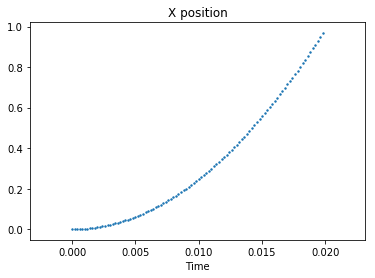

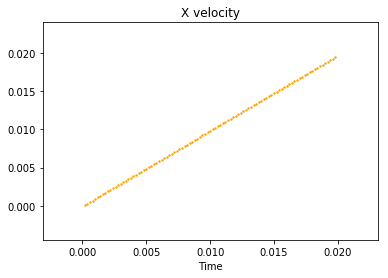

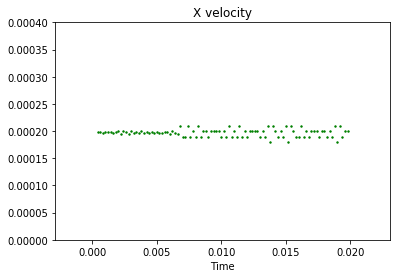

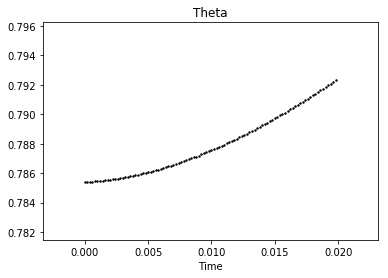

In [10]:
plt.scatter(y = spray.x, x = spray["time"], s = 2)
plt.title("X position")
plt.xlabel("Time")
plt.show()
plt.scatter(y = np.diff(spray.x), x = spray.loc[1:, "time"], s = 2, c= "orange")
plt.title("X velocity")
plt.xlabel("Time")
plt.show()

plt.scatter(y = np.diff(np.diff(spray.x)), x = spray.loc[2:, "time"], s = 2, c= "green")
plt.title("X velocity")
plt.xlabel("Time")
plt.ylim(0, 0.0004)
plt.show()

plt.scatter(y = spray.theta, x = spray.loc[:, "time"], s = 2, c= "black")
plt.title("Theta")
plt.xlabel("Time")

plt.show()

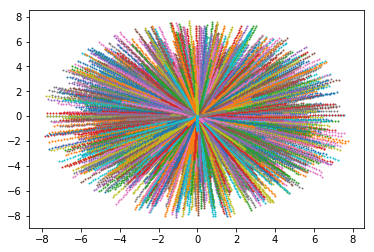

In [11]:
xx =1
yy = 2


while(xx < spray.shape[1]):
    plt.scatter(spray.iloc[:, xx], spray.iloc[:,yy], s = 1)
    xx +=8
    yy += 8

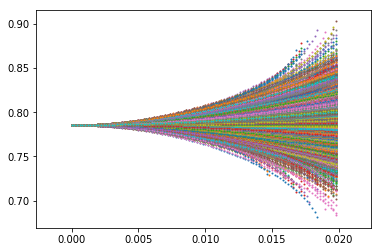

In [12]:
# plot thetas
xx = 3
while(xx < spray.shape[1]):
    plt.scatter(y = spray.iloc[:, xx], x = spray.loc[:,"time"], s = 1)
    xx +=8

In [15]:
# make a dataset
# Take 1st row (initial state), final row (goal), and get F, alpha, tao for each
spray.iloc[[0, 99], 0:9]

,time,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.000000,0.00000,0.0000,0.78540,3.9270,0.0001,0.0001,0.00000,0.00000
99,0.019802,0.96882,0.4435,0.79232,3.9286,96.7420,44.5180,0.57936,0.10528


In [25]:
ii = 0


tmpdf = pd.DataFrame(pd.concat([spray.iloc[[0], ii:(ii + 9)].reset_index(drop=True), spray.iloc[[99], 0:9].reset_index(drop=True)], axis = 1))

In [26]:
newdf

,time,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot,time,x,y,theta,phi,x_dot,y_dot,theta_dot,phi_dot
0,0.0,0.0,0.0,0.7854,3.927,0.0001,0.0001,0.0,0.0,0.019802,0.96882,0.4435,0.79232,3.9286,96.742,44.518,0.57936,0.10528


,x,x
0,0.0,0.96882
